<a href="https://colab.research.google.com/github/PrajwalPPatil/TitanicData_LR_model/blob/main/Eduonix_ML(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Load Dataset
data = pd.read_excel('/content/Testdataset3.xlsx')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Diaplay First Few Rows
print("\nFirst Few Rows in the Dataset: ")
print(data.head())


First Few Rows in the Dataset: 
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [ ]:
# Identify Data Types of Each Columns
print("\nData Types of Each Columns: ")
print(data.dtypes)


Data Types of Each Columns: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Check missing values/inconsistent data in Dataset
missing_values = data.isnull().sum()
print("\nMissing values in Each Columns: ")
print(missing_values)


Missing values in Each Columns: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Data Cleaning**

In [ ]:
# Handle missing values
data['Age'].fillna(data['Age'].median(),inplace=True) #Fill missing values with median
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)  #Fill missing values with mode
data.drop(columns=['Cabin'],inplace=True)  # Due to many missing values in Cabin Columns

In [ ]:
# Check summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
# Convert Categorical Features into Numerical
data['Sex']=data['Sex'].map({'male':0,'female':1}) #Convert 'Sex' column to 0 & 1
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}) #Use Label-Encoding for 'Embarked'
data['Survived']=data['Survived'].astype(int)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**EDA**

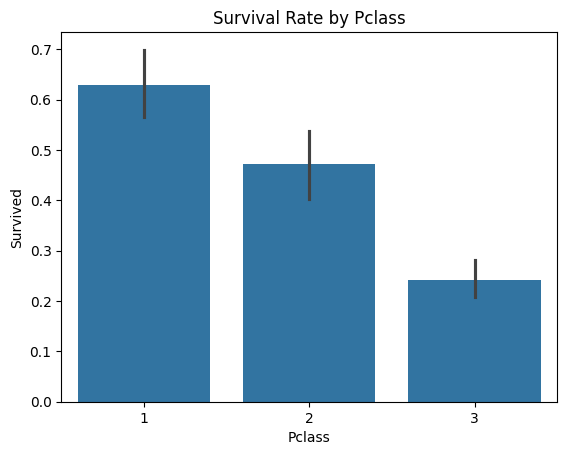

In [ ]:
#Survival Rate by Pclass
#Barplot of survival rate by Pclass
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title('Survival Rate by Pclass')
plt.show()

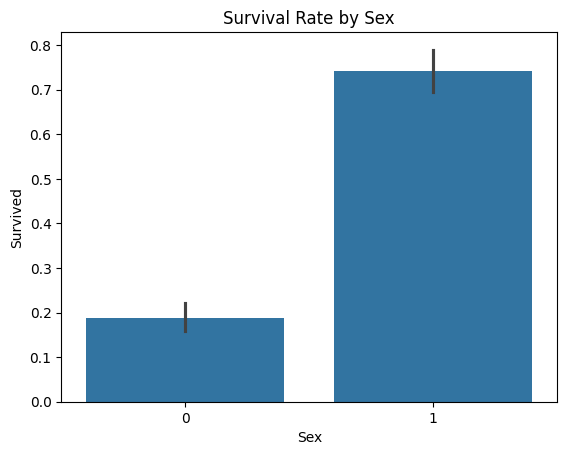

In [ ]:
# Survival Rate by Sex
sns.barplot(x='Sex',y='Survived',data=data)
plt.title('Survival Rate by Sex')
plt.show()

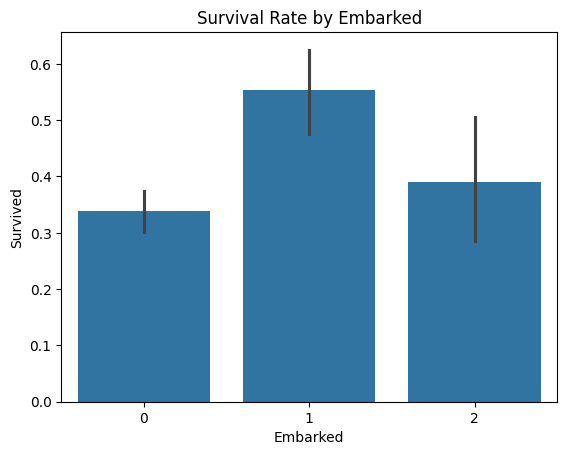

In [ ]:
# Survival Rate by Embarked
sns.barplot(x='Embarked',y='Survived',data=data)
plt.title('Survival Rate by Embarked')
plt.show()

In [ ]:
data['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
13.8583,1
50.4958,1
5.0000,1


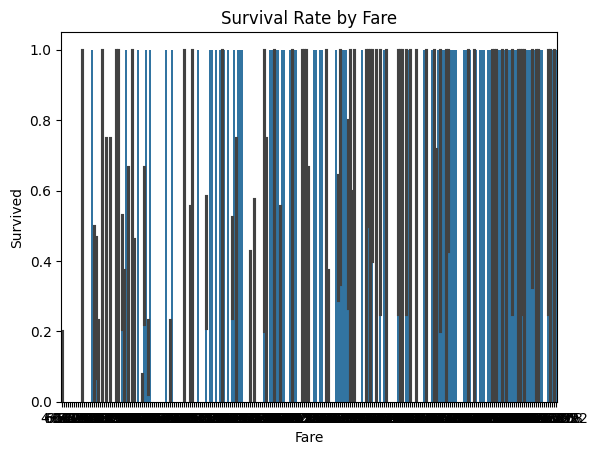

In [ ]:
# Survival Rate by Fare
sns.barplot(x='Fare',y='Survived',data=data)
plt.title('Survival Rate by Fare')
plt.show()

**Model Building**

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
data.drop(columns=['Name','Ticket'],inplace=True)

In [ ]:
# Create X and y
X=data.drop(columns='Survived')
y=data['Survived']

In [ ]:
# Split data into train & testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Build LR model
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
# make prediction
y_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
# Display result
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",acc)
print("Precision: ",prec)
print("Recall: ",rec)
print("F1: ",f1)

Confusion Matrix: 
[[90 15]
 [21 53]]
Accuracy:  0.7988826815642458
Precision:  0.7794117647058824
Recall:  0.7162162162162162
F1:  0.7464788732394366


Insights:


1.   In our data there is 90 True Negative values.
2.   In our data there is 15 False Positive values.
3.   In our data there is 21 FN Vales.
4.  In our data there is 53 TP values




Result: The accuracy of our data is 79.88 % using LogisticRegression models.